In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:\MSIS\FML Lab\Part 1\Dataset\Social_Network_Ads.csv")

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.describe(include="all")

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [5]:
#Check NULL values
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
#Selecting columns
X=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

In [7]:
#Splitting Dataset into Training and Testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [8]:
#Scaling values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [9]:
#Implementing RandomForest Model with n_estimators=10 and criterion='entropy'
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
Classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [10]:
y_pred = Classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [11]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [12]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[63,  5],
       [ 4, 28]], dtype=int64)

In [13]:
#Accuracy of the Model
from sklearn import metrics
prediction=metrics.accuracy_score(y_test,y_pred)
print("Accuracy :",prediction*100,'%')

Accuracy : 91.0 %


C:\Users\akash\AppData\Local\Temp\ipykernel_1556\721672893.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


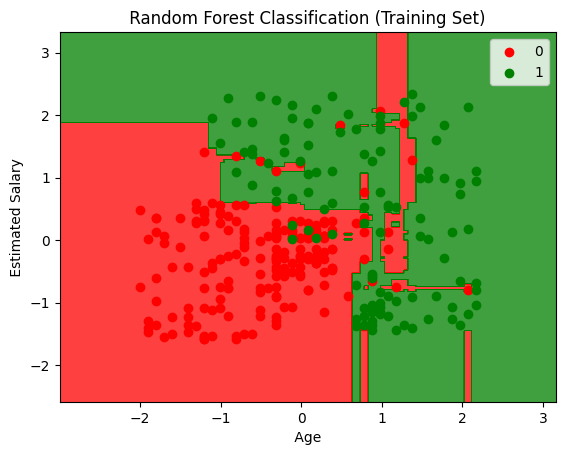

In [14]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min() -1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2,Classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
 
for i,j in enumerate(np.unique(y_set)):
   plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
 
plt.title(" Random Forest Classification (Training Set) ")
plt.xlabel(" Age ")
plt.ylabel(" Estimated Salary ")
plt.legend()
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_1556\3675258176.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


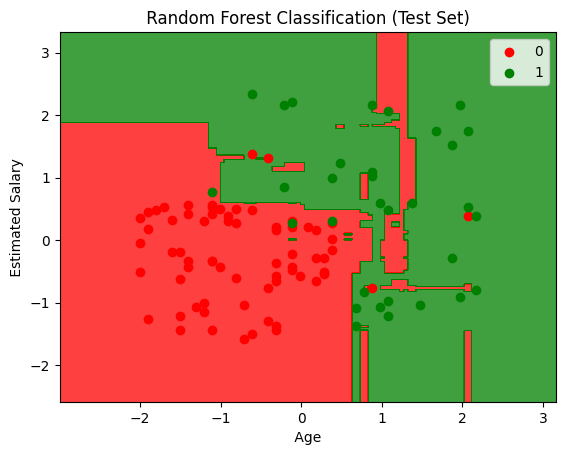

In [15]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min() -1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2,Classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
 
for i,j in enumerate(np.unique(y_set)):
   plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
 
plt.title(" Random Forest Classification (Test Set) ")
plt.xlabel(" Age ")
plt.ylabel(" Estimated Salary ")
plt.legend()
plt.show()

In [16]:
#Implementing RandomForest Model with n_estimators=20 and criterion='gini'
from sklearn.ensemble import RandomForestClassifier
classifier2=RandomForestClassifier(n_estimators=20,criterion='gini',random_state=0)
classifier2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [17]:
y_pred= classifier2.predict(X_test)

In [18]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[65,  3],
       [ 4, 28]], dtype=int64)

In [19]:
#Accuracy of the Model
from sklearn import metrics
prediction=metrics.accuracy_score(y_test,y_pred)
print("Accuracy :",prediction*100,'%')

Accuracy : 93.0 %
